In [3]:
import pandas as pd
bulgaria = pd.read_csv("../../data/regular-reports/bulgaria-reports.csv")
estonia = pd.read_csv("../../data/regular-reports/estonia-reports.csv")
latvia = pd.read_csv("../../data/regular-reports/latvia-reports.csv")
lithuania = pd.read_csv("../../data/regular-reports/lithuania-reports.csv")
turkey = pd.read_csv("../../data/regular-reports/turkey-reports.csv")

In [4]:
dfs = [turkey, bulgaria, lithuania, estonia, latvia]
filtered_dfs = []
for df in dfs:
    cols_to_keep = ['Country', 'Year'] + [c for c in df.columns if c.startswith('Chapter')]
    filtered_dfs.append(df[cols_to_keep])

combined_df = pd.concat(filtered_dfs, ignore_index=True)

In [5]:
combined_df.head()

,Country,Year,Chapter 1: Free movement of Goods,Chapter 2: Free movement of Persons,Chapter 3: Freedom to provide services,Chapter 4: Free movement of capital,Chapter 4.5: Public procurement,Chapter 5: Company law,Chapter 5.5: Intellectual property law,Chapter 6: Competition policy,...,Chapter 21.5.2: Judiciary and fundamental rights cont'd,Chapter 22: Environment,Chapter 23: Consumers and health protection,"Chapter 24: Co-operation in the field of justice and home affairs / Justice, freedom and security",Chapter 25: Customs union,Chapter 26: External relations,Chapter 27: Common Foreign and Security Policy,Chapter 28: Financial Control,Chapter 29: Financial and budgetary provisions,Chapter 24: Co-operation in the field of justice and home affairs
0,Turkey,1998,Current situation\nAs agreed in the framework ...,NaN,Current situation\nA substantial part of the C...,Current situation\nVarious obligations were se...,NaN,Current situation\nIn accordance with the Cust...,NaN,Current situation\nIn the context of the imple...,...,NaN,Current situation\nAlthough some progress has ...,Current situation\nThe adoption of outline con...,Current situation\nEC-Turkey Association Counc...,Current situation\nSince the implementation of...,NaN,Turkey has had an association with the Communi...,NaN,NaN,NaN
1,Turkey,1999,Current situation\nThere is free movement of i...,NaN,A few legislative developments entered into fo...,After a long period of gradual opening up of i...,NaN,Current situation\nPatent protection on pharma...,NaN,Current situation\nThere has been no significa...,...,NaN,The last regular report indicated that the Tur...,Turkish alignment with the consumer protection...,The last Regular Report called on Turkey to de...,NaN,NaN,NaN,NaN,NaN,NaN
2,Turkey,2000,"Since the last Regular Report, according to th...",In the area of mutual recognition of professio...,Little progress has been made in the field of ...,The Regular Report of 1999 stated that after a...,NaN,No progress can be reported concerning the ali...,NaN,"Since the previous Regular Report, Turkey has ...",...,NaN,Since the last Regular report no evidence of p...,No progress has taken place since the last reg...,Compared to the situation in 1999 no major pro...,The new Turkish Customs Code entered into forc...,As Turkey is already in a Customs Union with t...,The political dialogue established under the A...,"In the area of financial control, no fundament...",Some progress has been made over the past year...,NaN
3,Turkey,2001,Since the last Regular Report Turkey has made ...,The reporting period has not seen any signific...,Turkey has made moderate progress in aligning ...,"Since the previous report, Turkey has made lim...",NaN,"Turkey has made some progress in this area, in...",NaN,"Since the last Regular Report, Turkey has made...",...,NaN,"Since the last Regular Report, Turkey has made...","During the reporting period, no further progre...",Some progress has been achieved over the past ...,Some progress has been achieved by Turkey in t...,Turkey’s Commercial policy is largely aligned ...,"Since the previous Regular Report, Turkey has ...",Progress in this domain has been limited.\nIn ...,Some progress has been made over the past year...,NaN
4,Turkey,2002,Progress since the last Regular Report\nSince ...,Progress since the last Regular Report\nThe cu...,Progress since the last Regular Report\nSince ...,Progress since the last Regular Report\nThere ...,NaN,Progress since the last Regular Report\nSince ...,NaN,Progress since the last Regular Report\nSince ...,...,NaN,Progress since the last Regular Report\nTurkey...,Progress since the last Regular Report\nThere ...,Progress since the last Regular Report\nOveral...,Progress since the last Regular Report\nSome p...,Progress since the last Regular Report\nFurthe...,Progress since the last Regular Report\nTurkey...,Progress since the last Regular Report\nSince ...,Progress since the last Regular Report\nTurkey...,NaN


In [19]:
chapter_columns = [col for col in combined_df.columns 
                   if col not in ['Country', 'Year']]

print(f"Found {len(chapter_columns)} chapter columns")

Found 37 chapter columns


In [20]:
word_counts_long = combined_df.melt(
    id_vars=['Country', 'Year'],
    value_vars=chapter_columns,
    var_name='Chapter_Name',
    value_name='Text'
)

In [21]:
def count_words(text):
    """Count words in a text string, handling missing values"""
    if pd.isna(text):
        return 0
    return len(str(text).split())

word_counts_long['Word_Count'] = word_counts_long['Text'].apply(count_words)


In [22]:
word_counts_long = word_counts_long.drop('Text', axis=1)
word_counts_long

,Country,Year,Chapter_Name,Word_Count
0,Turkey,1998,Chapter 1: Free movement of Goods,824
1,Turkey,1999,Chapter 1: Free movement of Goods,424
2,Turkey,2000,Chapter 1: Free movement of Goods,949
3,Turkey,2001,Chapter 1: Free movement of Goods,1609
4,Turkey,2002,Chapter 1: Free movement of Goods,1992
...,...,...,...,...
1512,Latvia,1998,Chapter 24: Co-operation in the field of justi...,855
1513,Latvia,1999,Chapter 24: Co-operation in the field of justi...,1106
1514,Latvia,2000,Chapter 24: Co-operation in the field of justi...,3741
1515,Latvia,2001,Chapter 24: Co-operation in the field of justi...,4267


In [24]:
chapter_numbers = pd.read_csv("../../data/metadata/chapter_names.csv")
word_counts_long = word_counts_long.merge(
    chapter_numbers,
    left_on='Chapter_Name',
    right_on='Chapter',  # Adjust column name if needed
    how='left'
)

In [25]:
word_counts_long

,Country,Year,Chapter_Name,Word_Count,Number,Chapter
0,Turkey,1998,Chapter 1: Free movement of Goods,824,1.0,Chapter 1: Free movement of Goods
1,Turkey,1999,Chapter 1: Free movement of Goods,424,1.0,Chapter 1: Free movement of Goods
2,Turkey,2000,Chapter 1: Free movement of Goods,949,1.0,Chapter 1: Free movement of Goods
3,Turkey,2001,Chapter 1: Free movement of Goods,1609,1.0,Chapter 1: Free movement of Goods
4,Turkey,2002,Chapter 1: Free movement of Goods,1992,1.0,Chapter 1: Free movement of Goods
...,...,...,...,...,...,...
1512,Latvia,1998,Chapter 24: Co-operation in the field of justi...,855,24.0,Chapter 24: Co-operation in the field of justi...
1513,Latvia,1999,Chapter 24: Co-operation in the field of justi...,1106,24.0,Chapter 24: Co-operation in the field of justi...
1514,Latvia,2000,Chapter 24: Co-operation in the field of justi...,3741,24.0,Chapter 24: Co-operation in the field of justi...
1515,Latvia,2001,Chapter 24: Co-operation in the field of justi...,4267,24.0,Chapter 24: Co-operation in the field of justi...


In [27]:
word_counts_avg = word_counts_long.groupby(['Country', 'Number'])['Word_Count'].mean().reset_index()
word_counts_avg.rename(columns={'Word_Count': 'Avg_Word_Count'}, inplace=True)


In [28]:
print(f"\nAverage word counts calculated for {len(word_counts_avg)} country-chapter combinations")
print("\nSample:")
print(word_counts_avg.head(10))



Average word counts calculated for 145 country-chapter combinations

Sample:
    Country  Number  Avg_Word_Count
0  Bulgaria     1.0      958.285714
1  Bulgaria     2.0      601.142857
2  Bulgaria     3.0      852.428571
3  Bulgaria     4.0      506.714286
4  Bulgaria     5.0      585.714286
5  Bulgaria     6.0      821.857143
6  Bulgaria     7.0     2472.000000
7  Bulgaria     8.0      733.428571
8  Bulgaria     9.0     1203.285714
9  Bulgaria    10.0      665.571429


In [29]:
closure_df = pd.read_csv("../../data/metadata/chapters_metadata.csv")

In [30]:
closure_df['Number'] = pd.to_numeric(closure_df['Number'])
word_counts_avg['Number'] = pd.to_numeric(word_counts_avg['Number'])

# Merge
df_analysis = closure_df.merge(
    word_counts_avg,
    on=['Country', 'Number'],
    how='left'
)

In [31]:
df_analysis

,Country,Number,Provisional Closure,Avg_Word_Count
0,Latvia,1,2001.0,1237.333333
1,Latvia,2,2001.0,497.333333
2,Latvia,3,2001.0,903.500000
3,Latvia,4,2001.0,535.833333
4,Latvia,5,2001.0,763.000000
...,...,...,...,...
140,Turkey,25,NaN,586.052632
141,Turkey,26,NaN,471.105263
142,Turkey,27,NaN,1067.473684
143,Turkey,28,NaN,715.052632


In [32]:
df_analysis = df_analysis.merge(
    chapter_numbers,
    on='Number',
    how='left'
)

In [33]:
df_analysis

,Country,Number,Provisional Closure,Avg_Word_Count,Chapter
0,Latvia,1,2001.0,1237.333333,Chapter 1: Free movement of Goods
1,Latvia,2,2001.0,497.333333,Chapter 2: Free movement of Persons
2,Latvia,3,2001.0,903.500000,Chapter 3: Freedom to provide services
3,Latvia,4,2001.0,535.833333,Chapter 4: Free movement of capital
4,Latvia,5,2001.0,763.000000,Chapter 5: Company law
...,...,...,...,...,...
140,Turkey,25,NaN,586.052632,Chapter 25: Customs union
141,Turkey,26,NaN,471.105263,Chapter 26: External relations
142,Turkey,27,NaN,1067.473684,Chapter 27: Common Foreign and Security Policy
143,Turkey,28,NaN,715.052632,Chapter 28: Financial Control


In [35]:
start_dates = {
    'Estonia': 1997,
    'Latvia': 1998,
    'Lithuania': 1998,
    'Bulgaria': 1999,
    'Turkey': 1998
}

df_analysis['Start_Year'] = df_analysis['Country'].map(start_dates)

# Make sure Provisional_Closure is numeric
df_analysis['Provisional Closure'] = pd.to_numeric(
    df_analysis['Provisional Closure'], 
    errors='coerce'
)

df_analysis['Years_to_Closure'] = (
    df_analysis['Provisional Closure'] - df_analysis['Start_Year']
)

In [36]:
df_analysis

,Country,Number,Provisional Closure,Avg_Word_Count,Chapter,Start_Year,Years_to_Closure
0,Latvia,1,2001.0,1237.333333,Chapter 1: Free movement of Goods,1998,3.0
1,Latvia,2,2001.0,497.333333,Chapter 2: Free movement of Persons,1998,3.0
2,Latvia,3,2001.0,903.500000,Chapter 3: Freedom to provide services,1998,3.0
3,Latvia,4,2001.0,535.833333,Chapter 4: Free movement of capital,1998,3.0
4,Latvia,5,2001.0,763.000000,Chapter 5: Company law,1998,3.0
...,...,...,...,...,...,...,...
140,Turkey,25,NaN,586.052632,Chapter 25: Customs union,1998,NaN
141,Turkey,26,NaN,471.105263,Chapter 26: External relations,1998,NaN
142,Turkey,27,NaN,1067.473684,Chapter 27: Common Foreign and Security Policy,1998,NaN
143,Turkey,28,NaN,715.052632,Chapter 28: Financial Control,1998,NaN


In [37]:
df_analysis = df_analysis.dropna(subset=['Years_to_Closure'])
print(f"After removing missing closures: {len(df_analysis)} rows")

After removing missing closures: 117 rows


In [38]:
df_analysis = df_analysis.dropna(subset=['Avg_Word_Count'])
print(f"After removing missing word counts: {len(df_analysis)} rows")

# Remove rows with very low word counts (potential data issues)
df_analysis = df_analysis[df_analysis['Avg_Word_Count'] > 100]
print(f"After removing very short chapters (<100 words): {len(df_analysis)} rows")

After removing missing word counts: 117 rows
After removing very short chapters (<100 words): 117 rows


In [41]:
df_final = df_analysis[[
    'Country',
    'Number',
    'Chapter',  # Adjust column name if different in chapter_numbers
    'Provisional Closure',
    'Start_Year',
    'Years_to_Closure',
    'Avg_Word_Count'
]].copy()

# Sort for easier viewing
df_final = df_final.sort_values(['Country', 'Number']).reset_index(drop=True)


In [43]:
from scipy import stats
print(df_final[['Years_to_Closure', 'Avg_Word_Count']].describe())

print("\n=== BY COUNTRY ===")
country_summary = df_final.groupby('Country').agg({
    'Years_to_Closure': ['mean', 'median', 'std', 'count'],
    'Avg_Word_Count': ['mean', 'median', 'std']
}).round(2)
print(country_summary)

print("\n=== BY CHAPTER NUMBER ===")
chapter_summary = df_final.groupby('Number').agg({
    'Years_to_Closure': ['mean', 'median'],
    'Avg_Word_Count': ['mean', 'median']
}).round(2)
print(chapter_summary.head(10))

### STEP 11: Preliminary correlation
print("\n=== PRELIMINARY CORRELATION ===")
corr, p_value = stats.pearsonr(
    df_final['Avg_Word_Count'], 
    df_final['Years_to_Closure']
)
print(f"Correlation between Avg Word Count and Years to Closure:")
print(f"  r = {corr:.3f}")
print(f"  p-value = {p_value:.4f}")


       Years_to_Closure  Avg_Word_Count
count        117.000000      117.000000
mean           3.000000      778.179682
std            1.203443      566.574595
min            1.000000      156.250000
25%            2.000000      431.250000
50%            3.000000      601.142857
75%            4.000000      852.428571
max            8.000000     3090.333333

=== BY COUNTRY ===
          Years_to_Closure                    Avg_Word_Count                
                      mean median   std count           mean  median     std
Country                                                                     
Bulgaria              2.62    3.0  1.37    29         908.00  733.43  588.83
Estonia               3.38    3.0  1.37    29         552.34  431.25  405.73
Latvia                2.90    3.0  0.72    29         857.51  708.00  595.43
Lithuania             2.93    3.0  0.70    29         806.26  559.20  618.46
Turkey                8.00    8.0   NaN     1         447.79  447.79     NaN

===

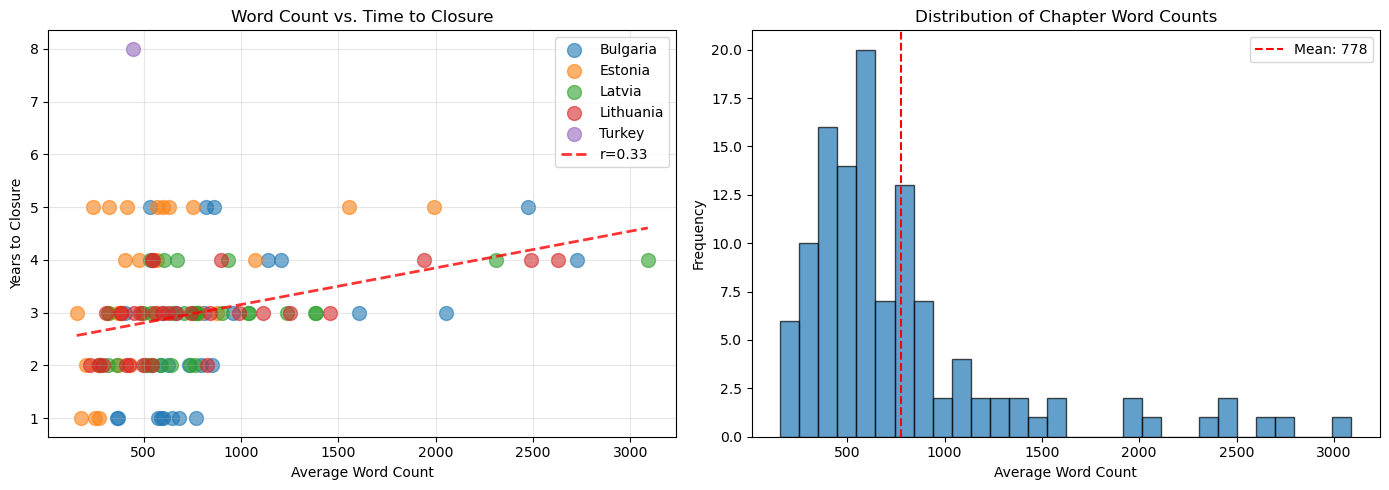

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Scatter plot
for country in df_final['Country'].unique():
    country_data = df_final[df_final['Country'] == country]
    axes[0].scatter(country_data['Avg_Word_Count'], 
                    country_data['Years_to_Closure'],
                    label=country, alpha=0.6, s=100)

axes[0].set_xlabel('Average Word Count')
axes[0].set_ylabel('Years to Closure')
axes[0].set_title('Word Count vs. Time to Closure')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Add trend line
x = df_final['Avg_Word_Count']
y = df_final['Years_to_Closure']
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
x_line = np.linspace(x.min(), x.max(), 100)
axes[0].plot(x_line, p(x_line), "r--", alpha=0.8, linewidth=2,
            label=f'r={corr:.2f}')
axes[0].legend()

# Distribution of word counts
axes[1].hist(df_final['Avg_Word_Count'], bins=30, edgecolor='black', alpha=0.7)
axes[1].set_xlabel('Average Word Count')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Distribution of Chapter Word Counts')
axes[1].axvline(df_final['Avg_Word_Count'].mean(), color='red', 
                linestyle='--', label=f"Mean: {df_final['Avg_Word_Count'].mean():.0f}")
axes[1].legend()

plt.tight_layout()
plt.savefig('word_count_analysis.png', dpi=300, bbox_inches='tight')
plt.show()
